#Carregamento dos dados dobre o modelo LSTM

##Realizando carregamento dos dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/DadosIC/BrennoDados.zip -d /content

Archive:  /content/drive/MyDrive/DadosIC/BrennoDados.zip
   creating: /content/DadosModelo1/
  inflating: /content/DadosModelo1/y_modelo1.npy  
  inflating: /content/DadosModelo1/X_modelo1.npy  


##Bibliotecas utilizadas

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

##Carregando numpy salvos

In [ ]:
dir_list = os.listdir('/content/DadosModelo1')

In [ ]:
dir_list

['y_modelo1.npy', 'X_modelo1.npy']

In [ ]:
with open('/content/DadosModelo1/y_modelo1.npy', 'rb') as f:
    y = np.load(f)
with open('/content/DadosModelo1/X_modelo1.npy', 'rb') as f:
    X = np.load(f)

Os dados são desbalanceados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


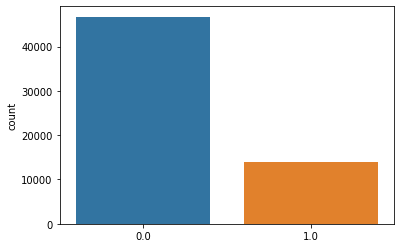

In [ ]:
#Levemente desba
y = np.concatenate((np.zeros(46722), np.ones(14040)), axis=0)
sns.countplot(y)

Moldando o reshape para entrada LSTM

In [ ]:
X = X.reshape((X.shape[0], 1, 1024))
y = y.reshape((y.shape[0],1))

##Modelo sem Undersampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(1,1024)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(20, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(10, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs = 30,
    validation_split = 0.2,
    batch_size = 32
)

Epoch 1/30
1216/1216 [==============================] - 14s 8ms/step - loss: 0.7545 - accuracy: 0.5929 - val_loss: 0.6159 - val_accuracy: 0.6864
Epoch 2/30
1216/1216 [==============================] - 8s 7ms/step - loss: 0.6190 - accuracy: 0.6899 - val_loss: 0.5658 - val_accuracy: 0.7427
Epoch 3/30
1216/1216 [==============================] - 8s 7ms/step - loss: 0.5819 - accuracy: 0.7268 - val_loss: 0.5522 - val_accuracy: 0.7576
Epoch 4/30
1216/1216 [==============================] - 8s 7ms/step - loss: 0.5694 - accuracy: 0.7435 - val_loss: 0.5438 - val_accuracy: 0.7654
Epoch 5/30
1216/1216 [==============================] - 8s 7ms/step - loss: 0.5581 - accuracy: 0.7521 - val_loss: 0.5404 - val_accuracy: 0.7669
Epoch 6/30
1216/1216 [==============================] - 8s 7ms/step - loss: 0.5522 - accuracy: 0.7572 - val_loss: 0.5373 - val_accuracy: 0.7690
Epoch 7/30
1216/1216 [==============================] - 8s 7ms/step - loss: 0.5478 - accuracy: 0.7589 - val_loss: 0.5362 - val_accuracy

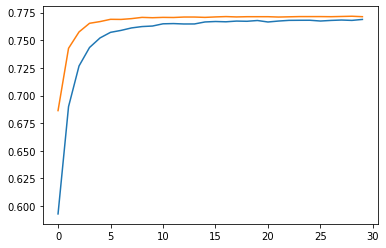

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

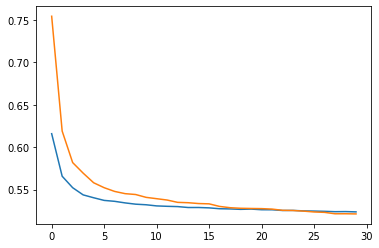

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.5242812633514404, 0.7696865200996399]

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
y_pred = np.zeros(y_predict.shape[0])
k = 0
for i in y_predict:
    if i[0][0] > 0.5:
        y_pred[k] = 1
    k += 1

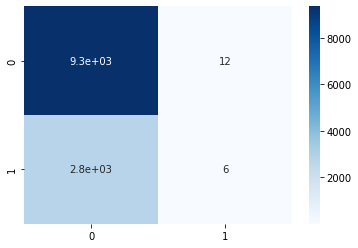

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

O modelo desbalanceado basicamente chutou tudo como zero

##Modelo com undersampling

In [ ]:
y = np.concatenate((np.zeros(14040), np.ones(14040)), axis=0)
X = X[46722 - 14040 :]
X = X.reshape((X.shape[0], 1, 1024))
y = y.reshape((y.shape[0],1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Rede com 3 camdas LSTM 20,10,5

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(1,1024)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(20, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(10, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.LSTM(5, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    validation_split = 0.2,
    batch_size = 32
)

Epoch 1/100
562/562 [==============================] - 12s 12ms/step - loss: 0.7348 - accuracy: 0.5027 - val_loss: 0.6958 - val_accuracy: 0.5164
Epoch 2/100
562/562 [==============================] - 5s 8ms/step - loss: 0.7179 - accuracy: 0.5163 - val_loss: 0.6963 - val_accuracy: 0.5382
Epoch 3/100
562/562 [==============================] - 5s 8ms/step - loss: 0.7031 - accuracy: 0.5337 - val_loss: 0.6913 - val_accuracy: 0.5455
Epoch 4/100
562/562 [==============================] - 4s 8ms/step - loss: 0.7003 - accuracy: 0.5368 - val_loss: 0.6868 - val_accuracy: 0.5538
Epoch 5/100
562/562 [==============================] - 5s 8ms/step - loss: 0.6964 - accuracy: 0.5428 - val_loss: 0.6846 - val_accuracy: 0.5591
Epoch 6/100
562/562 [==============================] - 6s 10ms/step - loss: 0.6921 - accuracy: 0.5436 - val_loss: 0.6827 - val_accuracy: 0.5591
Epoch 7/100
562/562 [==============================] - 5s 9ms/step - loss: 0.6887 - accuracy: 0.5531 - val_loss: 0.6808 - val_accuracy: 0.5

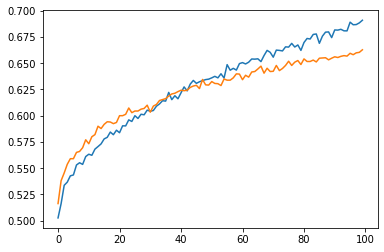

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

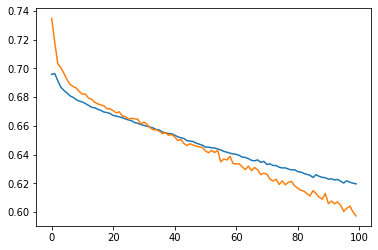

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.6149634122848511, 0.6711182594299316]

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
y_pred = np.zeros(y_predict.shape[0])
k = 0
for i in y_predict:
    if i[0][0] > 0.5:
        y_pred[k] = 1
    k += 1

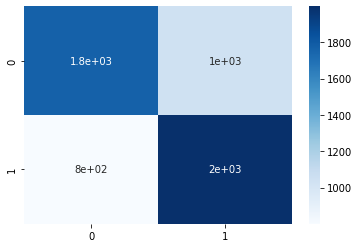

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

O modelo teve um melhor resultado, porém comoverfitting considerável

---

## Modelo Final



Para reduzir o overfitting foram aplicadas camadas de dropout e o modelo foi simplificado.

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(1,1024)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(20, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.55),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(10, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.55),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
)
history = model.fit(
    X_train,
    y_train,
    epochs = 500,
    validation_split = 0.1,
    batch_size = 32
)

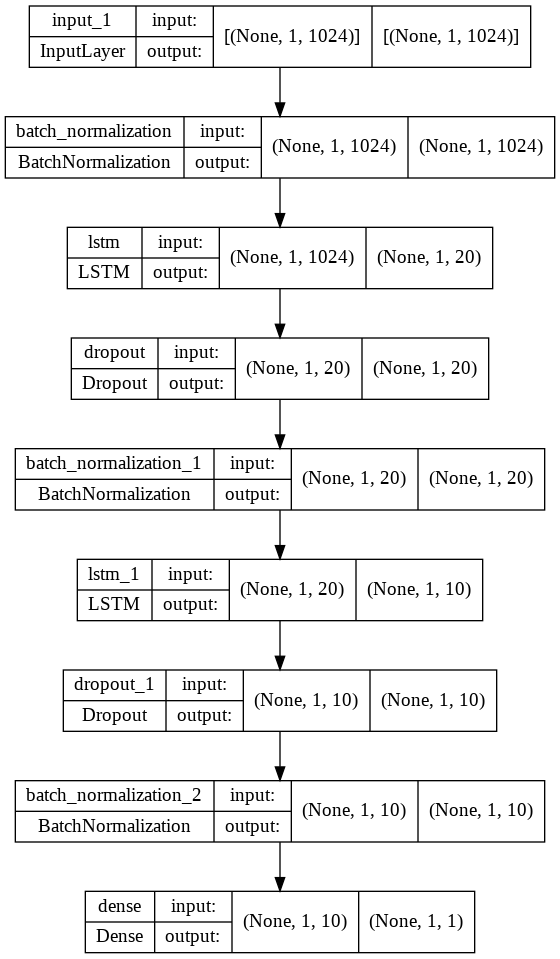

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

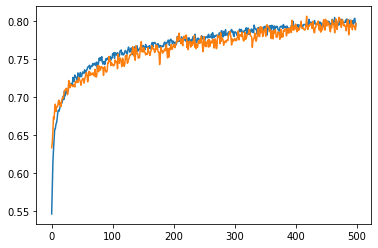

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

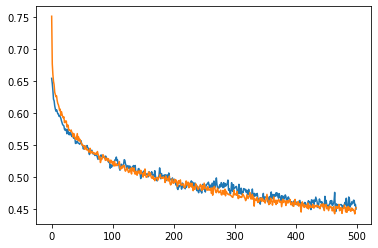

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [ ]:
model.evaluate(X_test, y_test)

176/176 [==============================] - 1s 3ms/step - loss: 0.4559 - binary_accuracy: 0.8015


[0.4559449255466461, 0.8014600872993469]

In [ ]:
probs = model.predict(X_test)
y_pred = np.zeros(probs.shape[0])
k = 0
for i in probs:
    if i[0][0] > 0.5:
        y_pred[k] = 1
    k += 1

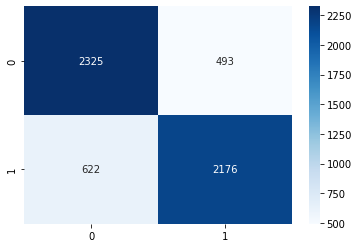

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(1,1024)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(20, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.55),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LSTM(10, return_sequences= True),#10
                                    tf.keras.layers.Dropout(0.55),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)
)

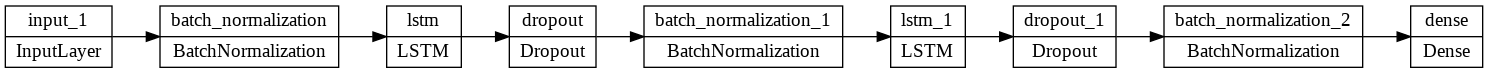

In [ ]:
tf.keras.utils.plot_model(model,rankdir='LR')